### Load data

In [ ]:
%pip install tabulate

### Node Profile input data

In [ ]:
import numpy as np 
import pandas as pd
import io
from IPython.display import display, Markdown

df = pd.read_csv('./foodhub_order.csv')

In [3]:
buf = io.StringIO()
df.info(buf=buf)
metadata = buf.getvalue()
head = df.head().to_markdown(index=False)
missing = df.isnull().sum()
missing = missing[missing > 0]
missing_info = "No missing values." if missing.empty else str(missing)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
obj_cols = [col for col in df.select_dtypes(include=['object', 'category'])]
date_cols = df.select_dtypes(include=['datetime', 'datetime64[ns]']).columns.tolist()
obj_cols_unique_values = {col: df[col].unique() for col in obj_cols if df[col].nunique() < 20}
duplicates = df.duplicated().sum()
duplicates_info = f"No duplicate records" if duplicates == 0 else f"str(duplicates) duplicate records found"

content = f"""
## Data Profiling Report\n
### Metadata\n
```{metadata}```\n\n
### Preview\n
{head}\n\n
### Missing Values\n
{missing_info}\n
### Duplicate records\n
{duplicates_info}\n
### Numeric columns\n
{numeric_cols}\n
### Date columns\n
{date_cols}\n
### Object columns\n
{obj_cols}\n
### Unique values of object columns with < 20 values\n
{obj_cols_unique_values}\n
"""

In [4]:
Markdown(content)


## Data Profiling Report

### Metadata

```<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
```


### Preview

|   order_id |   customer_id | restaurant_name           | cuisine_type   |   cost_of_the_order | day_of_the_week   | rating    |   food_preparation_time |   delivery_time |
|-----------:|--------------:|:--------------------------|:---------------|--------------------:|:------------------|:----------|------------------------:|----------------:|
|    1477147 |        337525 | Hangawi                   | Korean         |               30.75 | Weekend           | Not given |                      25 |              20 |
|    1477685 |        358141 | Blue Ribbon Sushi Izakaya | Japanese       |               12.08 | Weekend           | Not given |                      25 |              23 |
|    1477070 |         66393 | Cafe Habana               | Mexican        |               12.23 | Weekday           | 5         |                      23 |              28 |
|    1477334 |        106968 | Blue Ribbon Fried Chicken | American       |               29.2  | Weekend           | 3         |                      25 |              15 |
|    1478249 |         76942 | Dirty Bird to Go          | American       |               11.59 | Weekday           | 4         |                      25 |              24 |


### Missing Values

No missing values.

### Duplicate records

No duplicate records

### Numeric columns

['order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']

### Date columns

[]

### Object columns

['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

### Unique values of object columns with < 20 values

{'cuisine_type': array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object), 'day_of_the_week': array(['Weekend', 'Weekday'], dtype=object), 'rating': array(['Not given', '5', '3', '4'], dtype=object)}



In [5]:
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
import os

load_dotenv("./../.env")
openai_api_key = os.getenv("OPENAI_API_KEY")


llm = ChatOpenAI(model="gpt-4o-mini", api_key=openai_api_key, temperature=0.1)

prompt = f"""
You are a data profiling expert. Analyze the following data and provide a detailed report.
Your report should include the following details:
- Number of rows and columns
- Data types of each column
- Sample of the first few rows
- Recommendations for handling duplicates, if applicable.
  Duplicate records should be removed or handled appropriately.
- Recommend the right data types for each column, if applicable.
  For example, entity IDs that represents person, location, product should be strings, 
  dates should be in datetime format, metric columns like sales should be numeric, ranking, scores and similar ordinal data should be categorical.
- Recommendations for handling missing values, if applicable.
  - If a column has more than 60% missing values, it should be dropped.
  - For a numeric column with less than 60% missing values, it should be filled with the mean or median.
  - For a categorical column with less than 60% missing values, it should be treated as a separate category or filled with the mode.
  - For time series data with less than 60% missing values, missing values should be filled with forward-fill or backward-fill
  - When missing value signifies a distinct state or category (eg. 'Does Not Exist', 'No Event Occured'), impute with sentinel values like 0 or -1

Here is the data you need to analyze:
```{content}```
"""

response = llm.invoke(prompt)


In [6]:
Markdown(response.content if response else "No content returned from LLM.")

## Data Profiling Report

### Metadata

- **Number of Rows:** 1898
- **Number of Columns:** 9

### Data Types of Each Column

| Column                   | Non-Null Count | Data Type |
|-------------------------|----------------|-----------|
| order_id                | 1898           | int64     |
| customer_id             | 1898           | int64     |
| restaurant_name         | 1898           | object    |
| cuisine_type            | 1898           | object    |
| cost_of_the_order       | 1898           | float64   |
| day_of_the_week         | 1898           | object    |
| rating                  | 1898           | object    |
| food_preparation_time    | 1898           | int64     |
| delivery_time           | 1898           | int64     |

### Sample of the First Few Rows

|   order_id |   customer_id | restaurant_name           | cuisine_type   |   cost_of_the_order | day_of_the_week   | rating    |   food_preparation_time |   delivery_time |
|-----------:|--------------:|:--------------------------|:---------------|--------------------:|:------------------|:----------|------------------------:|----------------:|
|    1477147 |        337525 | Hangawi                   | Korean         |               30.75 | Weekend           | Not given |                      25 |              20 |
|    1477685 |        358141 | Blue Ribbon Sushi Izakaya | Japanese       |               12.08 | Weekend           | Not given |                      25 |              23 |
|    1477070 |         66393 | Cafe Habana               | Mexican        |               12.23 | Weekday           | 5         |                      23 |              28 |
|    1477334 |        106968 | Blue Ribbon Fried Chicken | American       |               29.2  | Weekend           | 3         |                      25 |              15 |
|    1478249 |         76942 | Dirty Bird to Go          | American       |               11.59 | Weekday           | 4         |                      25 |              24 |

### Recommendations for Handling Duplicates

- **Duplicate Records:** There are no duplicate records in the dataset. Therefore, no action is required regarding duplicates.

### Recommended Data Types for Each Column

| Column                   | Current Data Type | Recommended Data Type |
|-------------------------|-------------------|-----------------------|
| order_id                | int64             | string                |
| customer_id             | int64             | string                |
| restaurant_name         | object            | string                |
| cuisine_type            | object            | categorical           |
| cost_of_the_order       | float64           | float64               |
| day_of_the_week         | object            | categorical           |
| rating                  | object            | categorical           |
| food_preparation_time    | int64             | int64                 |
| delivery_time           | int64             | int64                 |

### Recommendations for Handling Missing Values

- **Missing Values:** There are no missing values in the dataset, so no action is required for handling missing values.

### Summary of Findings

- The dataset contains 1898 rows and 9 columns with no missing or duplicate records.
- The data types are mostly appropriate, but it is recommended to convert `order_id` and `customer_id` to strings for better handling of identifiers. Additionally, `cuisine_type`, `day_of_the_week`, and `rating` should be converted to categorical types for efficient storage and analysis.
- The numeric columns are appropriately typed, and no further action is needed for missing values as there are none.

### Conclusion

The dataset is clean and well-structured, with no immediate issues regarding duplicates or missing values. The recommended changes to data types will enhance the usability and performance of the dataset for analysis.

In [8]:
profile_report = response.content if response.content else "No content returned from LLM."

### Fix the dataset

In [125]:
%pip install langchain_experimental

Note: you may need to restart the kernel to use updated packages.


In [9]:
from langchain_core.tools import Tool
from langchain_experimental.utilities import PythonREPL
from langgraph.prebuilt import create_react_agent
import json

In [10]:
python_repl = PythonREPL(_globals={"df": df, "pd":pd})
repl_tool = Tool(
    name="python_repl",
    description="A Python shell. Use this to execute python commands. Input should be a valid python command.",
    func=python_repl.run,
)

In [ ]:
prompt = f"""
Instructions:
You are an expert data scientist with access to Python REPL tool. Review the provided profile report, write and execute a python code to update the given dataframe.
The dataframe 'df' is passed to the REPL tool as a global variable.

Your should make the following changes to the dataframe:
- Based on the data profiling report recommendations, update the dataframe.

Your code should :
1. Not import any libraries
2. Make a copy of the original dataframe to avoid modifying the original data using X = df.copy().
3. Strictly follow the recommendations provided in the profile report {profile_report}.
4. Save the updated dataframe as a parquet file using X.to_parquet('./ temp_data/df_updated.parquet', index=False)
5. Do not use inplace=True in any operation.


You should double check the code to ensure the accuracy,completeness and safety of the code before executing it.
Constraints:

1.  **Strictly Pandas DataFrame Operations:** You must only execute code that directly manipulates Pandas DataFrames (e.g., filtering, aggregation, merging, column transformations, saving as csv, etc.).
2.  **No Library Imports:** The code provided will *not* contain any `import` statements. The `pandas` library will be pre-loaded and accessible via the `_globals` dictionary. Assume `pd` is already available as an alias for `pandas`.
3.  **No Network Access:** Prohibit any operations that attempt to make network requests.
4.  **No System Calls:** Prohibit any calls to `subprocess` or `os.system`.
5.  **No Arbitrary Code Execution:** Do not allow execution of code that is not directly related to DataFrame manipulation. This includes, but is not limited to, defining functions, classes, or executing arbitrary Python logic.

Safety Check Procedure (Before Execution):

Before executing *any* code, perform the following checks:

1.  **Syntactic Check:** Ensure the code is valid Python syntax.
2.  **Keyword Blacklist:** Scan the code for the following prohibited keywords/functions:
    * `import`
    * `open`
    * `read_csv`
    * `os`
    * `subprocess`
    * `system`
    * `shutil`
    * `request` (and related network libraries like `urllib`, `http`, `socket`)
    * `file`
    * `with` (unless part of a `df.pipe()` or similar known safe Pandas construct)
    * `exec`
    * `eval`
    * `lambda` (unless part of a known safe Pandas apply/transform operation)
    * `def`
    * `class`
3.  **Object Access Check (Heuristic):** Favor code that operates directly on variables assumed to be DataFrames (e.g., `df.column`, `df.groupby(...), df.to_csv()`).

**If the code passes all safety checks, execute it and provide the output. If it fails any check, respond with a clear error message indicating the violated constraint.**

**Example Valid Input:**

```python
df['new_col'] = df['col1'] + df['col2']
df_filtered = df[df['col3'] > 10]
df_grouped = df.groupby('category')['value'].mean()
df_grouped.to_csv('./grouped_output.csv', index=False)

Provide a summary of changes made with relevant code executed.

"""


In [12]:
agent = create_react_agent(
    model=llm,
    tools=[repl_tool], 
    prompt = prompt
)

response = agent.invoke({"messages:": [{"role": "user", "content": "Create a python code and execute it to update the dataframe based on the profile report."}]},
             {"recursion_limit":7}
             )


Python REPL can execute arbitrary code. Use with caution.


In [13]:
response

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_uu4bsBZU0aYvSk8KDAPR5WLz', 'function': {'arguments': '{"__arg1":"X = df.copy()\\n\\n# Convert order_id and customer_id to string\\nX[\'order_id\'] = X[\'order_id\'].astype(str)\\nX[\'customer_id\'] = X[\'customer_id\'].astype(str)\\n\\n# Convert cuisine_type, day_of_the_week, and rating to categorical\\nX[\'cuisine_type\'] = X[\'cuisine_type\'].astype(\'category\')\\nX[\'day_of_the_week\'] = X[\'day_of_the_week\'].astype(\'category\')\\nX[\'rating\'] = X[\'rating\'].astype(\'category\')\\n\\n# Save the updated dataframe as a parquet file\\nX.to_parquet(\'./df_updated.parquet\', index=False)"}', 'name': 'python_repl'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 158, 'prompt_tokens': 1578, 'total_tokens': 1736, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'promp

In [14]:
Markdown(response['messages'][-1].content)

The code executed successfully, and the following changes were made to the dataframe:

1. A copy of the original dataframe was created to avoid modifying the original data.
2. The `order_id` column was converted from `int64` to `string`.
3. The `customer_id` column was converted from `int64` to `string`.
4. The `cuisine_type` column was converted from `object` to `categorical`.
5. The `day_of_the_week` column was converted from `object` to `categorical`.
6. The `rating` column was converted from `object` to `categorical`.
7. The updated dataframe was saved as a parquet file named `df_updated.parquet`.

If you need any further assistance or modifications, feel free to ask!

In [12]:
df = pd.read_parquet('./df_updated.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   object  
 1   customer_id            1898 non-null   object  
 2   restaurant_name        1898 non-null   object  
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   category
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(2), object(3)
memory usage: 95.6+ KB


### Summarize the data

In [13]:
# get summary statistics of the dataframe and pass it to the LLM model to summarize observations
from tabulate import tabulate   


summary_stats = df.describe(include='all').transpose()
summary_stats_md = tabulate(summary_stats, headers='keys', tablefmt='pipe')
# display(Markdown(summary_stats_md))
# Summarize the observations from the summary statistics
prompt = f"""
You are a data analyst. Analyze the following summary statistics of the DataFrame and provide a detailed report.
Your report should include the following details:
- Observations on the distribution of numeric columns
- Observations on the distribution of categorical columns
Here is the summary statistics you need to analyze:
```{summary_stats_md}```
"""
response = llm.invoke(prompt)
results = response.content if response else "No content returned from LLM."

summary_stats_report = f"""
## Summary Statistics Analysis Report\n
### Summary Statistics\n
{summary_stats_md}\n\n
### Observations\n
{results}\n\n

"""


In [14]:
display(Markdown(summary_stats_report))



## Summary Statistics Analysis Report

### Summary Statistics

|                       |   count |   unique | top         |   freq |     mean |       std |    min |    25% |    50% |      75% |    max |
|:----------------------|--------:|---------:|:------------|-------:|---------:|----------:|-------:|-------:|-------:|---------:|-------:|
| order_id              |    1898 |     1898 | 1477147     |      1 | nan      | nan       | nan    | nan    | nan    | nan      | nan    |
| customer_id           |    1898 |     1200 | 52832       |     13 | nan      | nan       | nan    | nan    | nan    | nan      | nan    |
| restaurant_name       |    1898 |      178 | Shake Shack |    219 | nan      | nan       | nan    | nan    | nan    | nan      | nan    |
| cuisine_type          |    1898 |       14 | American    |    584 | nan      | nan       | nan    | nan    | nan    | nan      | nan    |
| cost_of_the_order     |    1898 |      nan | nan         |    nan |  16.4989 |   7.48381 |   4.47 |  12.08 |  14.14 |  22.2975 |  35.41 |
| day_of_the_week       |    1898 |        2 | Weekend     |   1351 | nan      | nan       | nan    | nan    | nan    | nan      | nan    |
| rating                |    1898 |        4 | Not given   |    736 | nan      | nan       | nan    | nan    | nan    | nan      | nan    |
| food_preparation_time |    1898 |      nan | nan         |    nan |  27.372  |   4.63248 |  20    |  23    |  27    |  31      |  35    |
| delivery_time         |    1898 |      nan | nan         |    nan |  24.1617 |   4.97264 |  15    |  20    |  25    |  28      |  33    |


### Observations

### Detailed Report on Summary Statistics

#### Overview
The provided summary statistics represent a DataFrame containing 1,898 records across various columns related to food orders. The columns include both numeric and categorical data, which we will analyze to understand the distribution and characteristics of the dataset.

---

### Observations on the Distribution of Numeric Columns

1. **Cost of the Order**:
   - **Mean**: The average cost of the order is approximately **16.50**.
   - **Standard Deviation**: The standard deviation is **7.48**, indicating a moderate spread around the mean, suggesting that there are orders significantly below and above the average cost.
   - **Minimum and Maximum**: The minimum order cost is **4.47**, while the maximum is **35.41**. This range indicates that there are relatively low-cost orders as well as some high-cost orders.
   - **Quartiles**:
     - **25th Percentile**: **12.08** (indicating that 25% of the orders cost less than this amount).
     - **50th Percentile (Median)**: **14.14** (indicating that half of the orders cost less than this amount).
     - **75th Percentile**: **22.30** (indicating that 75% of the orders cost less than this amount).
   - **Distribution**: The distribution appears to be right-skewed, as the mean is higher than the median, suggesting that there are a few high-cost orders that are pulling the average up.

2. **Food Preparation Time**:
   - **Mean**: The average food preparation time is approximately **27.37 minutes**.
   - **Standard Deviation**: The standard deviation is **4.63 minutes**, indicating that preparation times are relatively consistent but with some variability.
   - **Minimum and Maximum**: The minimum preparation time is **20 minutes**, and the maximum is **35 minutes**, suggesting that all orders fall within a reasonable range.
   - **Quartiles**:
     - **25th Percentile**: **23 minutes**.
     - **50th Percentile (Median)**: **27 minutes**.
     - **75th Percentile**: **31 minutes**.
   - **Distribution**: The preparation time distribution appears to be fairly normal, with the mean and median being close to each other, indicating that most orders have a preparation time around the average.

3. **Delivery Time**:
   - **Mean**: The average delivery time is approximately **24.16 minutes**.
   - **Standard Deviation**: The standard deviation is **4.97 minutes**, indicating some variability in delivery times.
   - **Minimum and Maximum**: The minimum delivery time is **15 minutes**, and the maximum is **33 minutes**.
   - **Quartiles**:
     - **25th Percentile**: **20 minutes**.
     - **50th Percentile (Median)**: **25 minutes**.
     - **75th Percentile**: **28 minutes**.
   - **Distribution**: Similar to food preparation time, the delivery time distribution appears to be fairly normal, with the mean and median being close, suggesting that most delivery times are clustered around the average.

---

### Observations on the Distribution of Categorical Columns

1. **Order ID**:
   - There are **1,898 unique order IDs**, indicating that each order is distinct.

2. **Customer ID**:
   - There are **1,200 unique customer IDs**, with the most frequent customer (ID: 52832) placing **13 orders**. This suggests a diverse customer base, with some customers ordering multiple times.

3. **Restaurant Name**:
   - There are **178 unique restaurant names**, with **Shake Shack** being the most frequently ordered restaurant (219 orders). This indicates a potential preference for this restaurant among customers.

4. **Cuisine Type**:
   - There are **14 unique cuisine types**, with **American** cuisine being the most popular (584 orders). This suggests a strong preference for American cuisine in the dataset.

5. **Day of the Week**:
   - The dataset indicates orders are categorized into two groups: **Weekend** and presumably **Weekday** (not explicitly mentioned). The majority of orders (1,351) are placed on the weekend, indicating a trend where customers prefer to order food during their leisure time.

6. **Rating**:
   - There are **4 unique ratings**, with the most common rating being **Not given** (736 occurrences). This suggests that many customers did not provide a rating for their orders, which could limit insights into customer satisfaction.

---

### Conclusion
The analysis of the summary statistics reveals key insights into the dataset. The numeric columns indicate a moderate spread in order costs, food preparation times, and delivery times, with some right-skewness in order costs. The categorical columns show a diverse customer base with a strong preference for American cuisine and weekend orders. The high frequency of "Not given" ratings suggests a potential area for improvement in customer feedback collection. Overall, these insights can guide further analysis and decision-making in areas such as marketing strategies, customer engagement, and operational efficiency.





### Univariate Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import base64
from langchain_core.messages import HumanMessage

In [16]:
def univariate(df: pd.DataFrame):

    visualizations = []
    univariate_report = f""
    numeric_cols = df.select_dtypes(include=np.number).columns.to_list()

    categorical_cols = [col for col in df.select_dtypes(include=['object', 'category']) if df[col].nunique() < 20]

    try:
        # Histograms for Each Numeric Column
        fig, axes = plt.subplots(len(numeric_cols),1,figsize = (10, 8))
        for i, col in enumerate(numeric_cols):
            sns.histplot(df[col], ax = axes[i], kde=True)
            axes[i].set_title(f"Histogram of {col}")
        
        # path = (Path(__file__).parent/"images/Histogram_plots.png").absolute()
        plt.tight_layout()
        path = Path(os.path.join(os.getcwd(), "images", "Histograms.png")).absolute()
        fig.savefig(path, bbox_inches='tight')
        visualizations.append(("Histograms of Numeric Features", path))
        plt.close(fig)


        # Box Plots for Each Numeric Column
        fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 8))
        for i, col in enumerate(numeric_cols):
            sns.boxplot(x=df[col], ax=axes[i])
            axes[i].set_title(f"Box Plot of {col}")
        
        plt.tight_layout()
        path = Path(os.path.join(os.getcwd(), "images", "Boxplots.png")).absolute()
        fig.savefig(path, bbox_inches='tight')
        visualizations.append(("Box Plots of Numeric Features", path))
        plt.close(fig)

        # Count Plots for Each Categorical Column
        fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 8))
        for i, col in enumerate(categorical_cols):
            sns.countplot(x=df[col], ax=axes[i], hue=df[col], order = df[col].value_counts().index)
            axes[i].set_xticks(axes[i].get_xticks())
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=270)
            axes[i].set_title(f"Count Plot of {col}")
            
        plt.tight_layout()
        path = Path(os.path.join(os.getcwd(), "images", "Countplots.png")).absolute()
        fig.savefig(path, bbox_inches='tight')
        visualizations.append(("Count Plots of Categorical Features", path))
        plt.close(fig)

        
        univariate_stats = df[numeric_cols].describe().transpose()
        univariate_report_md = tabulate(univariate_stats, headers='keys', tablefmt='pipe')
        univariate_report += f"""Histogram and Box Plot data of numeric features\n\n{univariate_report_md}\n\n"""

        for col in categorical_cols:
            univariate_stats = df[col].value_counts(ascending=False).to_markdown()
            univariate_report += f"""Count Plot data of {col}\n\n{univariate_stats}\n\n"""


    except Exception as e:
        print(f"An error occurred while generating univariate plots: {e}")
    
    return visualizations, univariate_report


In [17]:
visualizations, univariate_report = univariate(df)

In [18]:
visualizations

[('Histograms of Numeric Features',
  WindowsPath('c:/Users/aruns/Documents/Learning/Agentic AI/Langgraph_workflows/src/images/Histograms.png')),
 ('Box Plots of Numeric Features',
  WindowsPath('c:/Users/aruns/Documents/Learning/Agentic AI/Langgraph_workflows/src/images/Boxplots.png')),
 ('Count Plots of Categorical Features',
  WindowsPath('c:/Users/aruns/Documents/Learning/Agentic AI/Langgraph_workflows/src/images/Countplots.png'))]

In [19]:
Markdown(univariate_report)

Histogram and Box Plot data of numeric features

|                       |   count |    mean |     std |   min |   25% |   50% |     75% |   max |
|:----------------------|--------:|--------:|--------:|------:|------:|------:|--------:|------:|
| cost_of_the_order     |    1898 | 16.4989 | 7.48381 |  4.47 | 12.08 | 14.14 | 22.2975 | 35.41 |
| food_preparation_time |    1898 | 27.372  | 4.63248 | 20    | 23    | 27    | 31      | 35    |
| delivery_time         |    1898 | 24.1617 | 4.97264 | 15    | 20    | 25    | 28      | 33    |

Count Plot data of cuisine_type

| cuisine_type   |   count |
|:---------------|--------:|
| American       |     584 |
| Japanese       |     470 |
| Italian        |     298 |
| Chinese        |     215 |
| Mexican        |      77 |
| Indian         |      73 |
| Middle Eastern |      49 |
| Mediterranean  |      46 |
| Thai           |      19 |
| French         |      18 |
| Southern       |      17 |
| Korean         |      13 |
| Spanish        |      12 |
| Vietnamese     |       7 |

Count Plot data of day_of_the_week

| day_of_the_week   |   count |
|:------------------|--------:|
| Weekend           |    1351 |
| Weekday           |     547 |

Count Plot data of rating

| rating    |   count |
|:----------|--------:|
| Not given |     736 |
| 5         |     588 |
| 4         |     386 |
| 3         |     188 |



In [ ]:
# Helper Function: Encode Image to Base64
def encode_image_to_base64(image_path):
    """
    Encodes an image file to a base64 string.
    Required for sending local images to OpenAI's vision models.
    """
    try:
        with open(image_path, "rb") as image_file:
            encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
        print(f"Image '{image_path}' encoded to base64.")
        return encoded_string
    except FileNotFoundError:
        print(f"Error: Image file not found at '{image_path}'")
        return None
    except Exception as e:
        print(f"Error encoding image: {e}")
        return None


In [ ]:

# Vision Analysis Function 
# def vision_analysis(llm, image_source: tuple, data_report):
#     """
#     Analyzes an image using LangChain and OpenAI's GPT-4o mini model.

#     Args:
#         llm: OpenAI model instance for invoking the analysis.
#         image_source (str): A tuple (img_title: str, img_path: Path) for the image.

#     Returns:
#         str: The analysis result from the OpenAI model, or an error message.
#     """
#     img_title = image_source[0]
#     img_path = image_source[1]
#     prompt_text = f"""
#     You are an expert data analyst.  Your tasks to do step by step are
#     1. Analyze the image titled '{img_title}' and generate visual observations
#     2. Validate the observations using 'data report'
#     3. Provide a detailed analysis report
    
#     Final report need not have any information about validation.
#     The image is expected to contain visualizations such as histograms, box plots, 
#     count plots, correlation charts, pair plots, or bivariate box plots.

#     **Important Restriction:** You can leverage the visual features of the charts to provide insights, but avoid making specific numerical claims
#     or calculations that would require precise data extraction from the image.
#     Instead focus on qualitative observations, trends, and patterns. 
#     Validate the visual observations using {data_report}
    
    
#     Your analysis should be comprehensive and cover the following aspects:
#     - Describe the visual characteristics (any patterns, trends, or anomalies) present in the chart.
#     - Provide insights based on the visual representation of the data.
#     - Discuss the implications of the observed patterns in the context of the data.
#     - Avoid making specific numerical claims or calculations that would require precise data extraction from the image.
    
#     The analysis should be structured based on the type of chart present in the image.
    
#     For Histograms, please provide:
#     - Describe the shape of the distribution (e.g., symmetric, skewed right/left, unimodal, bimodal, uniform).
#     - Comment on the visual clustering or typical range of the data.
#     - Describe the visual spread or variability of the data.
#     - Point out any visually apparent outliers or unusual features.
#     - Insights on what the data might represent based on its distribution.

#     For Box Plots, please provide:
#     - Describe the skewness (if any) based on the median's position within the box and whisker lengths.
#     - Comment on the spread of the middle 50% of the data.
#     - Comment on the overall range of the data, excluding outliers.
#     - Point out any visually apparent outliers and their approximate locations.
#     - Insights on the data might represent.

#     For Count Plots, please provide:
#     - Describe the categories displayed and their relative frequencies (e.g., "Category A appears much more frequent than Category B").
#     - Indicate which categories visually represent the most and least frequent.
#      Comment on the overall distribution of frequencies across categories (e.g., relatively even, heavily skewed towards one category, presence of many less frequent categories).
#     - Highlight any visually dominant or surprisingly rare categories.
#     - Insights on what these frequencies tell us about the categorical variable being analyzed.

#     For Correlation Charts (e.g., Heatmaps of Correlation Matrices), please provide:
#     - Describe the variables being correlated.
#     - Discuss the perceived strength and direction (positive/negative) of the correlation between key pairs of variables.
#     - Highlight any pairs exhibiting strong direct or inverse relationships.
#     - Point out any variables that show little to no apparent relationship.
#     - Insights on what these relationships might imply about the connections between the variables.

#     For **Pair Plots (Scatterplot Matrix)**, please provide:
#     - For each scatter plot (off-diagonal):
#         - Describe the general visual trend and relationship between the two variables (e.g., linear, non-linear, no apparent relationship).
#         - Comment on the perceived strength and direction of the relationship.
#         - Identify any visual clusters, distinct patterns, or unusual data points.
#     - For each histogram/KDE plot (diagonal):
#         - Describe the distribution of the individual variable (e.g., shape, central tendency, spread, outliers).
#         - Insights on the overall relationships and distributions of the numeric variables in the dataset.

#     For **Bivariate Box Plots (e.g., Box plots grouped by a categorical variable)**, please provide:
#     - For each categorical group:
#         - Describe the approximate central tendency and spread of the numeric variable within that group.
#         - Comment on the visual range of the data within each group, excluding outliers.
#         - Point out any visually apparent outliers within each group and their approximate locations.
#     - Compare the distributions of the numeric variable across different categories:
#         - Discuss qualitative differences in central tendencies, spreads, and presence/absence of outliers between groups
#         - Describe any apparent relationships between the categorical variable and the numeric variable.
#     - Provide insights on how the categorical variable might visually influence the numeric variable.

#     Please structure your response as a Markdown report with clear headings and bullet points.

#     """
#     image_content = {}
#     image_markdown_tag = ""

#     if str(img_path).startswith("http://") or str(img_path).startswith("https://"):
#         # If it's a URL, use it directly
#         image_content = {"type": "image_url", "image_url": {"url": str(img_path)}}
#         image_markdown_tag = f"![{img_title}]({str(img_path)})"
#         # print(f"Using image from URL: {image_source}")
#     else:
#         # Assume it's a local file path, encode to base64
#         encoded_image = encode_image_to_base64(img_path)
#         if not encoded_image:
#             return "Failed to encode image. Please check the image path."
#         image_content = {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{encoded_image}"}}
#         image_markdown_tag = f"![{img_title}](data:image/png;base64,{encoded_image})"
#         # print(f"Using local image file: {image_source}")

#     # Create the HumanMessage content with both text and image
#     # The 'content' parameter for HumanMessage accepts a list of dictionaries,
#     # where each dictionary can be a text part or an image part.
#     messages = [
#         HumanMessage(
#             content=[
#                 {"type": "text", "text": prompt_text},
#                 image_content,
#             ]
#         )
#     ]

#     try:
#         # print("\nSending request to OpenAI GPT-4o mini...")
#         # Invoke the model to get the analysis
#         response = llm.invoke(messages)
#         analysis_markdown = response.content if response.content else "No content returned from LLM."
#         display_markdown = f"{image_markdown_tag}"
#         return (display_markdown , analysis_markdown)
#     except Exception as e:
#         return f"An error occurred during analysis: {e}"
    

# def validate_visual_obs(llm, visual_obs, data_report):
#     """
#     Validates the visual observations report using data report and provides a validated output.

#     Args:
#         llm: OpenAI model instance for invoking the analysis.
#         visual_obs: Output from the vision model
#         data_report: Summary report from raw data to validate the visual observations

#     Returns:
#         str: The analysis result from the OpenAI model, or an error message.
#     """

#     display_markdown = visual_obs[0]
#     analysis_markdown = visual_obs[1]

#     prompt_text = f"""
#     You are an expert data analyst with a meticulous eye for detail. Your primary goal is to perform a rigorous validation
#     of "analysis_markdown" file using "data_report" file as the definitive source of truth.

#     **Step-by-Step Approach:**

#     1.  **Analyze Each Visual Observation Individually:** Go through each point, trend, or pattern described in the "analysis_markdown" section.
#     2.  **Compare with data_report:** For each visual observation, directly compare it with the relevant information, trends, and patterns presented in the "analysis_markdown."
#     3.  **Identify Discrepancies and Apply fixes:**
#         * If a visual observation is **fully supported** by the data, keep it as it is.
#         * If a visual observation is **partially supported or needs refinement** based on the data, then *revise the visual observation* to accurately reflect the data.
#         * If a visual observation is **contradicted or not present** in the data report, then provide the *correct insight* directly from the data report if applicable. If there's no corresponding data, remove that statement.
#     4.  **Final response:** Ensure that the final response includes a validated and accurate version of "analysis_markdown" file

#     **It is CRITICAL that you do NOT simply re-summarize thedata_report.** Your output must be a *transformation* of the visual observations, applying the data_report to validate, correct, and enhance them. Every point from the visual observations should be addressed.
    
#     **analysis_markdown to Validate:**
#     {analysis_markdown}

#     ---

#     **Supporting data_report:**
#     {data_report}
    
    
#     Please structure your response as a Markdown report with clear headings and bullet points.

#     """

#     response = llm.invoke(prompt)
#     response_final = response.content if response else "No content returned from LLM."
#     results = f"{display_markdown}\n\n{response_final} "

#     return results






# # Now write a function that takes the dataframe, generates the visualizations, and then analyzed each visualization to generate a report
# def generate_univariate_analysis_report(df, llm, summary_stats_report: str = summary_stats_report):
#     """
#     Generates a report based on univariate visualizations of the DataFrame.
    
#     Args:
#         df (pd.DataFrame): The DataFrame to analyze.
#         llm: OpenAI model instance for invoking the analysis.
    
#     Returns:
#         str: The complete report with visualizations and their analyses.
#     """

#     # Ensure 'images' directory exists for plots
#     plots_dir = Path(os.getcwd()) / "images"
#     os.makedirs(plots_dir, exist_ok=True)

#     try:
#         # Generate univariate visualizations
#         visualizations = univariate(df)

#         # Analyze each visualization using the vision_analysis function
#         report_content = "## Univariate Analysis Report\n\n"
    
#         for title, img_path in visualizations:
#             analysis_result = vision_analysis(llm, (title, img_path), summary_stats_report)
#             report_content += f"### {title}\n\n{analysis_result[0]}\n\n{analysis_result[1]}\n\n"
    
#         return report_content
    
#     except Exception as e:
#         raise Exception(f"An error occurred while generating the univariate analysis report: {e}")

In [23]:
# Now write a function that takes the dataframe, generates the visualizations, and then analyzed each visualization to generate a report
def generate_univariate_analysis(df, llm):
    """
    Generates a report based on univariate visualizations of the DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        llm: OpenAI model instance for invoking the analysis.
    
    Returns:
        str: The complete report with visualizations and their analyses.
    """

    # Ensure 'images' directory exists for plots
    plots_dir = Path(os.getcwd()) / "images"
    os.makedirs(plots_dir, exist_ok=True)

    try:
        # Generate univariate visualizations
        visualizations, univariate_report = univariate(df)

        # Setup prompt
        prompt = f"""
        You are an expert data analyst. Analyze the following data {univariate_report} and provide a detailed report.

        The data is used to create visualizations such as histograms, box plots, 
        count plots, correlation charts, pair plots, or bivariate box plots.
        
        Your analysis should be comprehensive and cover the following aspects:
        - Provide insights based on the characteristic of the data for each plot.
        - Discuss the implications of the observed patterns in the context of the data.
        
        The analysis should be structured based on the type of chart the data supports.
        
        For Histogram data, please provide:
        - Describe the shape of the distribution (e.g., symmetric, skewed right/left, unimodal, bimodal, uniform).
        - Comment on the typical range of the data.
        - Describe the  spread or variability of the data.
        - Point out any apparent outliers or unusual features.
        - Insights on what the data might represent based on its distribution.

        For Box Plot data, please provide:
        - Describe the skewness (if any) based on the median's position compared to 25th percentile and 75th percentile.
        - Comment on the spread of the middle 50% of the data.
        - Comment on the overall range of the data, excluding outliers.
        - Point out any apparent outliers and their approximate locations.
        - Insights on the data might represent.

        For Count Plot data, please provide:
        - Provide a high level summary of the categories and their relative frequencies
        - Indicate which categories represent the most and least frequent.
        Comment on the overall distribution of frequencies across categories (e.g., relatively even, heavily skewed towards one category, presence of many less frequent categories).
        - Highlight any dominant or surprisingly rare categories.
        - Insights on what these frequencies tell us about the categorical variable being analyzed.

        Please structure your response as a Markdown report with clear headings and bullet points.

        """

        # Analyze each visualization using the vision_analysis function
        report_content = "## Univariate Analysis Report\n\n"
    
        for title, img_path in visualizations:
            encoded_image = encode_image_to_base64(img_path)
            image_markdown_tag = f"![{title}](data:image/png;base64,{encoded_image})"
            report_content += f"### {title}\n\n{image_markdown_tag}\n\n"

        response = llm.invoke(prompt)
        analysis_results = response.content if response else "No content returned from LLM."
        report_content += f"{analysis_results}"
    
        return report_content
    
    except Exception as e:
        raise Exception(f"An error occurred while generating the univariate analysis report: {e}")

In [24]:
univariate_analysis = generate_univariate_analysis(df, llm)

Image 'c:\Users\aruns\Documents\Learning\Agentic AI\Langgraph_workflows\src\images\Histograms.png' encoded to base64.
Image 'c:\Users\aruns\Documents\Learning\Agentic AI\Langgraph_workflows\src\images\Boxplots.png' encoded to base64.
Image 'c:\Users\aruns\Documents\Learning\Agentic AI\Langgraph_workflows\src\images\Countplots.png' encoded to base64.


## Univariate Analysis Report

### Histograms of Numeric Features

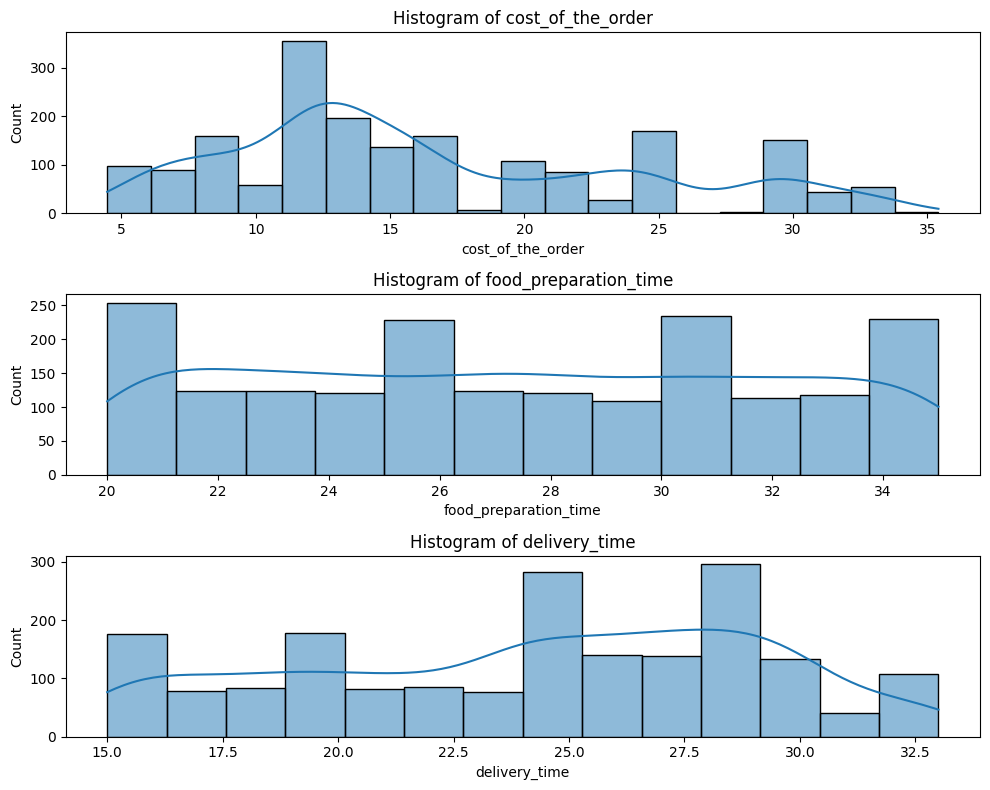

### Box Plots of Numeric Features

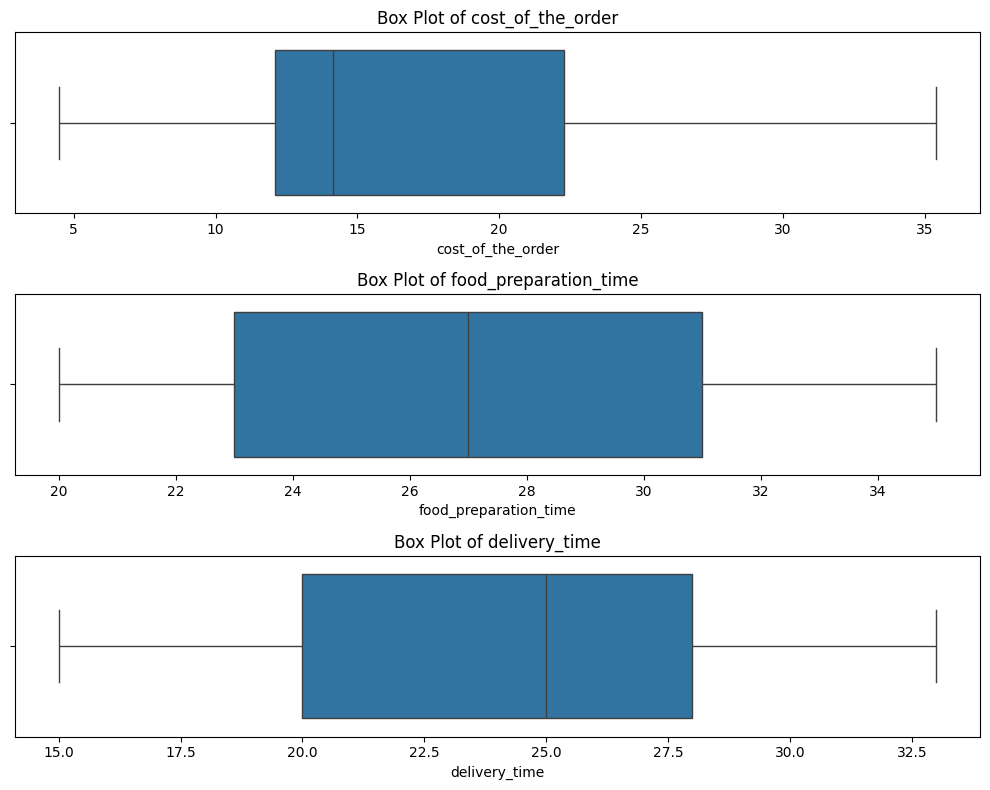

### Count Plots of Categorical Features

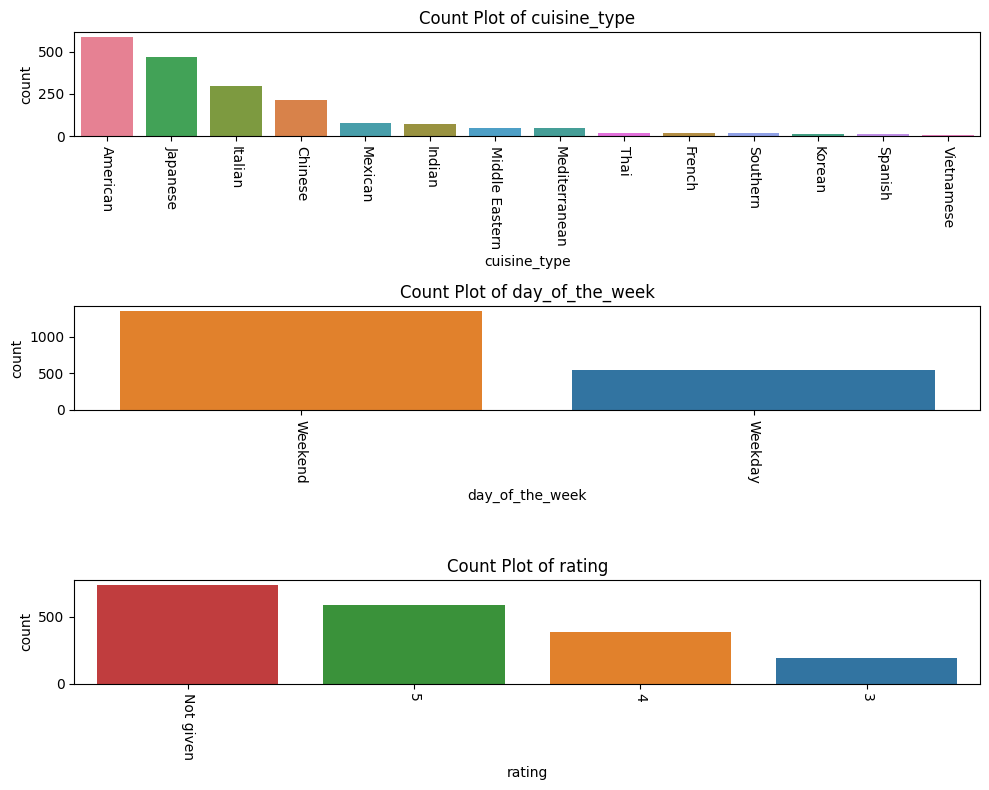

# Data Analysis Report

This report provides a comprehensive analysis of the provided data, focusing on histograms, box plots, and count plots. The analysis covers the characteristics of the data, insights derived from the distributions, and implications of observed patterns.

## Histogram Data Analysis

### 1. Cost of the Order
- **Distribution Shape**: The distribution appears to be right-skewed, indicating that most orders are on the lower end of the cost spectrum, with a few high-cost outliers.
- **Typical Range**: The majority of the costs fall between approximately $12.08 (25th percentile) and $22.30 (75th percentile).
- **Spread/Variability**: The standard deviation (7.48) suggests a moderate spread around the mean ($16.50), indicating variability in order costs.
- **Outliers**: The maximum cost ($35.41) is significantly higher than the 75th percentile, suggesting the presence of outliers.
- **Insights**: The data may represent a diverse range of order types, with most customers spending less than $22, while a small number are willing to spend significantly more.

### 2. Food Preparation Time
- **Distribution Shape**: The distribution appears to be slightly right-skewed, but relatively symmetric overall.
- **Typical Range**: Most food preparation times range from 23 minutes (25th percentile) to 31 minutes (75th percentile).
- **Spread/Variability**: The standard deviation (4.63) indicates a relatively low variability in preparation times.
- **Outliers**: The minimum (20 minutes) and maximum (35 minutes) are within a reasonable range, with no apparent outliers.
- **Insights**: The data suggests that food preparation times are consistent, which could indicate efficient kitchen operations.

### 3. Delivery Time
- **Distribution Shape**: The distribution is slightly right-skewed, indicating that while most deliveries are completed in a timely manner, there are some longer delivery times.
- **Typical Range**: Delivery times typically range from 20 minutes (25th percentile) to 28 minutes (75th percentile).
- **Spread/Variability**: The standard deviation (4.97) suggests moderate variability in delivery times.
- **Outliers**: The maximum delivery time (33 minutes) is higher than the 75th percentile, indicating potential outliers.
- **Insights**: The data indicates that while most deliveries are efficient, there are instances of delays that may need to be addressed.

## Box Plot Data Analysis

### 1. Cost of the Order
- **Skewness**: The median (14.14) is closer to the 25th percentile (12.08) than the 75th percentile (22.30), indicating a right skew.
- **Spread of Middle 50%**: The interquartile range (IQR) is approximately $10.22, indicating a significant spread in the middle 50% of the data.
- **Overall Range**: The range is from $4.47 to $35.41, excluding outliers.
- **Outliers**: There are potential outliers above $22.30, particularly around the maximum value.
- **Insights**: The presence of high-cost outliers suggests a segment of customers willing to spend significantly more, which could inform pricing strategies.

### 2. Food Preparation Time
- **Skewness**: The median (27) is centrally located between the 25th (23) and 75th (31) percentiles, indicating a symmetric distribution.
- **Spread of Middle 50%**: The IQR is 8 minutes, indicating a consistent preparation time for most orders.
- **Overall Range**: The range is from 20 to 35 minutes, with no apparent outliers.
- **Outliers**: No significant outliers are present.
- **Insights**: The consistent preparation times suggest effective kitchen management and could enhance customer satisfaction.

### 3. Delivery Time
- **Skewness**: The median (25) is closer to the 75th percentile (28) than the 25th percentile (20), indicating a slight right skew.
- **Spread of Middle 50%**: The IQR is 8 minutes, indicating a moderate spread in delivery times.
- **Overall Range**: The range is from 15 to 33 minutes, excluding outliers.
- **Outliers**: Potential outliers may exist above the 75th percentile.
- **Insights**: The delivery times are generally efficient, but the presence of longer delivery times may require further investigation.

## Count Plot Data Analysis

### 1. Cuisine Type
- **Summary of Categories**: The most frequent cuisine type is American (584), followed by Japanese (470) and Italian (298). The least frequent are Vietnamese (7) and Spanish (12).
- **Dominant Categories**: American and Japanese cuisines dominate the dataset, accounting for a significant portion of orders.
- **Distribution**: The distribution is heavily skewed towards American and Japanese cuisines, with many categories having low frequencies.
- **Insights**: The popularity of American and Japanese cuisines may reflect consumer preferences and could guide menu offerings.

### 2. Day of the Week
- **Summary of Categories**: The majority of orders occur on weekends (1351), while weekdays account for only 547.
- **Dominant Category**: Weekend orders are significantly more frequent than weekday orders.
- **Distribution**: The distribution is heavily skewed towards weekends, indicating a potential peak in demand during these days.
- **Insights**: This pattern suggests that marketing efforts could be focused on weekdays to boost order volume.

### 3. Rating
- **Summary of Categories**: The majority of ratings are "Not given" (736), followed by 5 (588) and 4 (386). Ratings of 3 or lower are less frequent.
- **Dominant Categories**: The high number of "Not given" ratings may indicate a lack of feedback or customer engagement.
- **Distribution**: The distribution shows a positive skew, with more high ratings than low ratings.
- **Insights**: The high proportion of positive ratings suggests customer satisfaction, but the "Not given" category indicates a need for improved feedback collection.

## Conclusion

The analysis of the provided data reveals several key insights into customer behavior, preferences, and operational efficiency. The right-skewed distributions in cost and delivery times suggest a segment of high spenders and potential delays, while the consistent food preparation times indicate effective kitchen management. The count plots highlight the dominance of certain cuisines and the peak demand on weekends, providing valuable information for strategic decision-making. Overall, the data presents opportunities for targeted marketing, menu optimization, and operational improvements.

In [25]:
display(Markdown(univariate_analysis))

### Bivariate Analysis

In [26]:
def bivariate(df: pd.DataFrame):

    visualizations = []
    bivariate_report = f""

    numeric_cols = df.select_dtypes(include=np.number).columns.to_list()

    categorical_cols = [col for col in df.select_dtypes(include=['object', 'category']) if df[col].nunique() < 20]

    try:
        # Correlation chart for Numeric Columns
        if len(numeric_cols) > 1:
            plt.figure(figsize=(12, 8))
            corr = df[numeric_cols].corr()
            sns.heatmap(corr, annot=True, fmt=".2f", cmap='Spectral',vmin=-1,vmax=1)
            plt.title("Correlation Heatmap of Numeric Features")
            path = Path(os.path.join(os.getcwd(), "images", "Correlation_heatmap.png")).absolute()
            plt.savefig(path, bbox_inches='tight')
            visualizations.append(("Correlation Heatmap of Numeric Features", path))
            plt.close();
        
            corr_report = df[numeric_cols].corr().to_markdown()
            bivariate_report +=f"Correlation Heatmap data\n\n{corr_report}\n\n"

        # Box Plots for Categorical Columns against Numeric Columns
        if numeric_cols and categorical_cols:
            for cat_col in categorical_cols:
                for num_col in numeric_cols:
                    plt.figure(figsize=(10, 6))
                    sns.boxplot(x=df[cat_col], 
                                y=df[num_col], 
                                hue = df[cat_col], 
                                legend = False,
                                order=df.groupby(cat_col, observed=False)[num_col].median().sort_values(ascending=False).index
                                )
                    plt.title(f"Box Plot of {num_col} by {cat_col}")
                    plt.xlabel(cat_col)
                    plt.ylabel(num_col)
                    if df[cat_col].nunique() > 10:
                        plt.xticks(rotation=270)
                    path = Path(os.path.join(os.getcwd(), "images", f"Boxplot_{num_col}_vs_{cat_col}.png")).absolute()
                    plt.savefig(path, bbox_inches='tight')
                    visualizations.append((f"Box Plot of {num_col} by {cat_col}", path))
                    plt.close();

                    
                    bivariate_stats = df.groupby(cat_col, observed=False)[num_col].describe().transpose()
                    bivariate_report_md = tabulate(bivariate_stats, headers='keys', tablefmt='pipe')
                    bivariate_report += f"""Box Plot data of {num_col} by {cat_col}\n\n{bivariate_report_md}\n\n"""
                    
        
        

    except Exception as e:
        print(f"An error occurred while generating univariate plots: {e}")
    
    return visualizations, bivariate_report


In [27]:
bivariate_visualizations, bivariate_report = bivariate(df)
bivariate_visualizations

[('Correlation Heatmap of Numeric Features',
  WindowsPath('c:/Users/aruns/Documents/Learning/Agentic AI/Langgraph_workflows/src/images/Correlation_heatmap.png')),
 ('Box Plot of cost_of_the_order by cuisine_type',
  WindowsPath('c:/Users/aruns/Documents/Learning/Agentic AI/Langgraph_workflows/src/images/Boxplot_cost_of_the_order_vs_cuisine_type.png')),
 ('Box Plot of food_preparation_time by cuisine_type',
  WindowsPath('c:/Users/aruns/Documents/Learning/Agentic AI/Langgraph_workflows/src/images/Boxplot_food_preparation_time_vs_cuisine_type.png')),
 ('Box Plot of delivery_time by cuisine_type',
  WindowsPath('c:/Users/aruns/Documents/Learning/Agentic AI/Langgraph_workflows/src/images/Boxplot_delivery_time_vs_cuisine_type.png')),
 ('Box Plot of cost_of_the_order by day_of_the_week',
  WindowsPath('c:/Users/aruns/Documents/Learning/Agentic AI/Langgraph_workflows/src/images/Boxplot_cost_of_the_order_vs_day_of_the_week.png')),
 ('Box Plot of food_preparation_time by day_of_the_week',
  Wi

In [28]:
Markdown(bivariate_report)


Correlation Heatmap data

|                       |   cost_of_the_order |   food_preparation_time |   delivery_time |
|:----------------------|--------------------:|------------------------:|----------------:|
| cost_of_the_order     |           1         |               0.0415275 |      -0.0299492 |
| food_preparation_time |           0.0415275 |               1         |       0.0110943 |
| delivery_time         |          -0.0299492 |               0.0110943 |       1         |

Box Plot data of cost_of_the_order by cuisine_type

|       |   American |   Chinese |   French |   Indian |   Italian |   Japanese |   Korean |   Mediterranean |   Mexican |   Middle Eastern |   Southern |   Spanish |     Thai |   Vietnamese |
|:------|-----------:|----------:|---------:|---------:|----------:|-----------:|---------:|----------------:|----------:|-----------------:|-----------:|----------:|---------:|-------------:|
| count |  584       |  215      | 18       | 73       | 298       |  470       | 13       |        46       |  77       |          49      |   17       |  12       | 19       |      7       |
| mean  |   16.3198  |   16.3052 | 19.7939  | 16.9197  |  16.4187  |   16.3045  | 14.0015  |        15.4748  |  16.9331  |          18.8206 |   19.3006  |  18.9942  | 19.2079  |     12.8829  |
| std   |    7.46229 |    7.6315 |  6.50899 |  7.89749 |   7.26883 |    7.42272 |  7.56354 |         7.60472 |   7.55511 |           8.0865 |    7.96603 |   6.65821 |  7.57915 |      5.31962 |
| min   |    4.71    |    4.75   | 11.98    |  5.34    |   5.05    |    4.47    |  5.77    |         5.67    |   4.85    |           5.77   |    7.38    |  12.13    |  6.69    |      6.01    |
| 25%   |   12.08    |   12.105  | 13.0525  | 11.64    |  12.08    |   12.08    | 11.84    |        12.0925  |  12.08    |          12.95   |   12.47    |  12.915   | 12.71    |     10.02    |
| 50%   |   14.12    |   14.12   | 20.47    | 16.15    |  14.48    |   14.07    | 12.18    |        13.995   |  15.57    |          16.3    |   16.11    |  16.52    | 19.35    |     12.13    |
| 75%   |   22.26    |   21.88   | 23.655   | 24.2     |  22.26    |   21.83    | 14.02    |        18.7825  |  22.36    |          25.27   |   29.15    |  24.4925  | 24.2     |     14.87    |
| max   |   33.18    |   34.19   | 29.25    | 33.03    |  33.03    |   33.37    | 30.75    |        35.41    |  33.32    |          32.93   |   31.43    |  29.1     | 32.93    |     22.26    |

Box Plot data of food_preparation_time by cuisine_type

|       |   American |   Chinese |   French |   Indian |   Italian |   Japanese |   Korean |   Mediterranean |   Mexican |   Middle Eastern |   Southern |   Spanish |     Thai |   Vietnamese |
|:------|-----------:|----------:|---------:|---------:|----------:|-----------:|---------:|----------------:|----------:|-----------------:|-----------:|----------:|---------:|-------------:|
| count |  584       | 215       | 18       | 73       | 298       |   470      | 13       |        46       |  77       |         49       |   17       |  12       | 19       |      7       |
| mean  |   27.4401  |  27.5116  | 26.8889  | 27.1096  |  27.4832  |    27.5106 | 25.4615  |        27       |  26.7273  |         26.6735  |   27.5882  |  26.9167  | 27.3158  |     25.7143  |
| std   |    4.65847 |   4.75852 |  5.03971 |  4.62049 |   4.51947 |     4.6045 |  3.97105 |         4.90804 |   4.60445 |          4.01242 |    5.52335 |   4.50168 |  5.49801 |      5.15475 |
| min   |   20       |  20       | 21       | 20       |  20       |    20      | 20       |        20       |  20       |         20       |   20       |  20       | 21       |     20       |
| 25%   |   23       |  23.5     | 22.5     | 23       |  23       |    24      | 23       |        23       |  23       |         24       |   24       |  23.75    | 22       |     21.5     |
| 50%   |   27       |  27       | 25.5     | 27       |  28       |    27.5    | 25       |        27       |  26       |         27       |   26       |  27.5     | 28       |     25       |
| 75%   |   31       |  32       | 31       | 31       |  31       |    32      | 26       |        31       |  31       |         30       |   33       |  28.5     | 32.5     |     29.5     |
| max   |   35       |  35       | 35       | 35       |  35       |    35      | 33       |        35       |  35       |         34       |   35       |  35       | 35       |     33       |

Box Plot data of delivery_time by cuisine_type

|       |   American |   Chinese |   French |   Indian |   Italian |   Japanese |   Korean |   Mediterranean |   Mexican |   Middle Eastern |   Southern |   Spanish |     Thai |   Vietnamese |
|:------|-----------:|----------:|---------:|---------:|----------:|-----------:|---------:|----------------:|----------:|-----------------:|-----------:|----------:|---------:|-------------:|
| count |  584       | 215       | 18       | 73       | 298       |  470       | 13       |        46       |   77      |         49       |   17       |  12       | 19       |      7       |
| mean  |   24.1935  |  23.8558  | 25.3333  | 24.0822  |  24.5671  |   24.1319  | 20.9231  |        23.587   |   24.3896 |         24.0816  |   23.8235  |  23.4167  | 23.1579  |     26.1429  |
| std   |    4.83184 |   4.96649 |  3.74166 |  5.05457 |   5.17933 |    4.98737 |  4.03033 |         5.42249 |    4.56   |          5.66361 |    5.96066 |   4.81396 |  4.99181 |      3.89138 |
| min   |   15       |  15       | 17       | 15       |  15       |   15       | 16       |        15       |   16      |         15       |   15       |  17       | 15       |     19       |
| 25%   |   20       |  20       | 23.25    | 20       |  20       |   20       | 17       |        19       |   21      |         19       |   21       |  19.75    | 19.5     |     25       |
| 50%   |   25       |  24       | 27       | 25       |  26       |   25       | 20       |        24       |   25      |         25       |   25       |  23       | 24       |     26       |
| 75%   |   28       |  28       | 28.75    | 29       |  28.75    |   28       | 26       |        28.75    |   28      |         29       |   28       |  28.25    | 26.5     |     28.5     |
| max   |   33       |  33       | 29       | 32       |  33       |   33       | 26       |        33       |   33      |         33       |   33       |  30       | 32       |     31       |

Box Plot data of cost_of_the_order by day_of_the_week

|       |   Weekday |    Weekend |
|:------|----------:|-----------:|
| count | 547       | 1351       |
| mean  |  16.3112  |   16.5748  |
| std   |   7.47952 |    7.48698 |
| min   |   4.75    |    4.47    |
| 25%   |  12.08    |   12.08    |
| 50%   |  14.07    |   14.41    |
| 75%   |  22.285   |   22.285   |
| max   |  35.41    |   33.37    |

Box Plot data of food_preparation_time by day_of_the_week

|       |   Weekday |    Weekend |
|:------|----------:|-----------:|
| count | 547       | 1351       |
| mean  |  27.2121  |   27.4367  |
| std   |   4.70862 |    4.60148 |
| min   |  20       |   20       |
| 25%   |  23       |   23       |
| 50%   |  27       |   27       |
| 75%   |  31       |   31       |
| max   |  35       |   35       |

Box Plot data of delivery_time by day_of_the_week

|       |   Weekday |    Weekend |
|:------|----------:|-----------:|
| count | 547       | 1351       |
| mean  |  28.34    |   22.47    |
| std   |   2.89143 |    4.62894 |
| min   |  24       |   15       |
| 25%   |  26       |   18.5     |
| 50%   |  28       |   22       |
| 75%   |  31       |   27       |
| max   |  33       |   30       |

Box Plot data of cost_of_the_order by rating

|       |         3 |        4 |        5 |   Not given |
|:------|----------:|---------:|---------:|------------:|
| count | 188       | 386      | 588      |   736       |
| mean  |  16.2234  |  16.7103 |  16.9657 |    16.0853  |
| std   |   7.84089 |   7.633  |   7.4487 |     7.32754 |
| min   |   4.75    |   4.75   |   4.47   |     4.66    |
| 25%   |  12.0425  |  12.13   |  12.13   |    11.8275  |
| 50%   |  14.12    |  14.16   |  15.205  |    14.07    |
| 75%   |  21.83    |  22.7875 |  22.8    |    21.5     |
| max   |  33.37    |  35.41   |  33.03   |    34.19    |

Box Plot data of food_preparation_time by rating

|       |         3 |         4 |         5 |   Not given |
|:------|----------:|----------:|----------:|------------:|
| count | 188       | 386       | 588       |   736       |
| mean  |  27.4309  |  27.3964  |  27.3554  |    27.3573  |
| std   |   4.76849 |   4.62078 |   4.69381 |     4.56294 |
| min   |  20       |  20       |  20       |    20       |
| 25%   |  23       |  23       |  23       |    23       |
| 50%   |  27       |  27       |  27.5     |    27       |
| 75%   |  32       |  31.75    |  32       |    31       |
| max   |  35       |  35       |  35       |    35       |

Box Plot data of delivery_time by rating

|       |         3 |         4 |         5 |   Not given |
|:------|----------:|----------:|----------:|------------:|
| count | 188       | 386       | 588       |   736       |
| mean  |  24.5585  |  23.8679  |  24.2126  |    24.1739  |
| std   |   4.65284 |   4.92338 |   5.01861 |     5.04102 |
| min   |  15       |  15       |  15       |    15       |
| 25%   |  21       |  20       |  20       |    20       |
| 50%   |  25       |  24       |  25       |    25       |
| 75%   |  28       |  28       |  28       |    28       |
| max   |  33       |  33       |  33       |    33       |



In [ ]:
# # Now write a function that takes the dataframe, generates the visualizations, and then analyzed each visualization to generate a report
# def generate_bivariate_analysis_report(df, llm, summary_stats_report: str = summary_stats_report):
#     """
#     Generates a report based on bivariate visualizations of the DataFrame.
    
#     Args:
#         df (pd.DataFrame): The DataFrame to analyze.
#         llm: OpenAI model instance for invoking the analysis.
    
#     Returns:
#         str: The complete report with visualizations and their analyses.
#     """

#     # Ensure 'images' directory exists for plots
#     plots_dir = Path(os.getcwd()) / "images"
#     os.makedirs(plots_dir, exist_ok=True)

#     try:
#         # Generate univariate visualizations
#         visualizations, bivariate_boxplot_report = bivariate(df)

#         # Analyze each visualization using the vision_analysis function
#         report_content = "## Correlation and bivariate Analysis Report\n\n"
    
#         for title, img_path in visualizations:
#             if "Correlation" in title or "Pairplot" in title:
#                 analysis_result = vision_analysis(llm, (title, img_path), summary_stats_report)
#             if "Box Plot" in title:
#                 analysis_result = vision_analysis(llm, (title, img_path), bivariate_boxplot_report)
                
#             report_content += f"### {title}\n\n{analysis_result}\n\n"
    
#         return report_content
    
#     except Exception as e:
#         raise Exception(f"An error occurred while generating the bivariate analysis report: {e}")

In [29]:
# Now write a function that takes the dataframe, generates the visualizations, and then analyzed each visualization to generate a report
def generate_bivariate_analysis(df, llm):
    """
    Generates a report based on bivariate visualizations of the DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        llm: OpenAI model instance for invoking the analysis.
    
    Returns:
        str: The complete report with visualizations and their analyses.
    """

    # Ensure 'images' directory exists for plots
    plots_dir = Path(os.getcwd()) / "images"
    os.makedirs(plots_dir, exist_ok=True)

    try:
        # Generate univariate visualizations
        visualizations, bivariate_report = bivariate(df)

        # Setup prompt
        prompt = f"""
        You are an expert data analyst. Analyze the following data {bivariate_report} and provide a detailed report.

        The data is used to create visualizations such as histograms, box plots, 
        count plots, correlation charts, pair plots, or bivariate box plots.
        
        Your analysis should be comprehensive and cover the following aspects:
        - Provide insights based on the characteristic of the data for each plot.
        - Discuss the implications of the observed patterns in the context of the data.
        
        The analysis should be structured based on the type of chart the data supports.
        
        For Correlation Chart data, please provide:
        - Discuss the perceived strength and direction (positive/negative) of the correlation between key pairs of variables.
        - Highlight any pairs exhibiting strong direct or inverse relationships.
        - Point out any variables that show little to no apparent relationship.
        - Insights on what these relationships might imply about the connections between the variables.

        For **Bivariate Box Plot data**, please provide:
        - Compare the distributions of the numeric variable across different categories:
            - Discuss  differences in central tendencies (50%) between groups
            - Discuss how the spread (75% minus 50%) varies between groups
            - Describe any apparent relationships between the categorical variable and the numeric variable.
        - Provide insights on how the categorical variable might influence the numeric variable.

        Please structure your response as a Markdown report with clear headings and bullet points.
        """

        # Analyze each visualization using the vision_analysis function
        report_content = "## Bivariate Analysis Report\n\n"
    
        for title, img_path in visualizations:
            encoded_image = encode_image_to_base64(img_path)
            image_markdown_tag = f"![{title}](data:image/png;base64,{encoded_image})"
            report_content += f"### {title}\n\n{image_markdown_tag}\n\n"

        response = llm.invoke(prompt)
        analysis_results = response.content if response else "No content returned from LLM."
        report_content += f"{analysis_results}"
    
        return report_content
    
    except Exception as e:
        raise Exception(f"An error occurred while generating the bivariate analysis report: {e}")

In [30]:
bivariate_analysis = generate_bivariate_analysis(df, llm)

Image 'c:\Users\aruns\Documents\Learning\Agentic AI\Langgraph_workflows\src\images\Correlation_heatmap.png' encoded to base64.
Image 'c:\Users\aruns\Documents\Learning\Agentic AI\Langgraph_workflows\src\images\Boxplot_cost_of_the_order_vs_cuisine_type.png' encoded to base64.
Image 'c:\Users\aruns\Documents\Learning\Agentic AI\Langgraph_workflows\src\images\Boxplot_food_preparation_time_vs_cuisine_type.png' encoded to base64.
Image 'c:\Users\aruns\Documents\Learning\Agentic AI\Langgraph_workflows\src\images\Boxplot_delivery_time_vs_cuisine_type.png' encoded to base64.
Image 'c:\Users\aruns\Documents\Learning\Agentic AI\Langgraph_workflows\src\images\Boxplot_cost_of_the_order_vs_day_of_the_week.png' encoded to base64.
Image 'c:\Users\aruns\Documents\Learning\Agentic AI\Langgraph_workflows\src\images\Boxplot_food_preparation_time_vs_day_of_the_week.png' encoded to base64.
Image 'c:\Users\aruns\Documents\Learning\Agentic AI\Langgraph_workflows\src\images\Boxplot_delivery_time_vs_day_of_the

## Bivariate Analysis Report

### Correlation Heatmap of Numeric Features

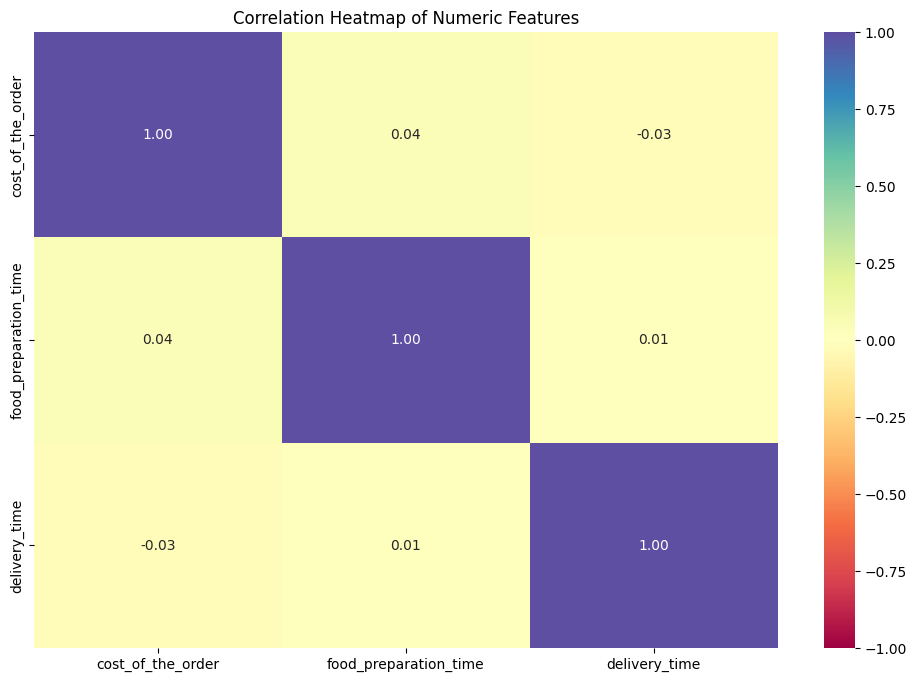

### Box Plot of cost_of_the_order by cuisine_type

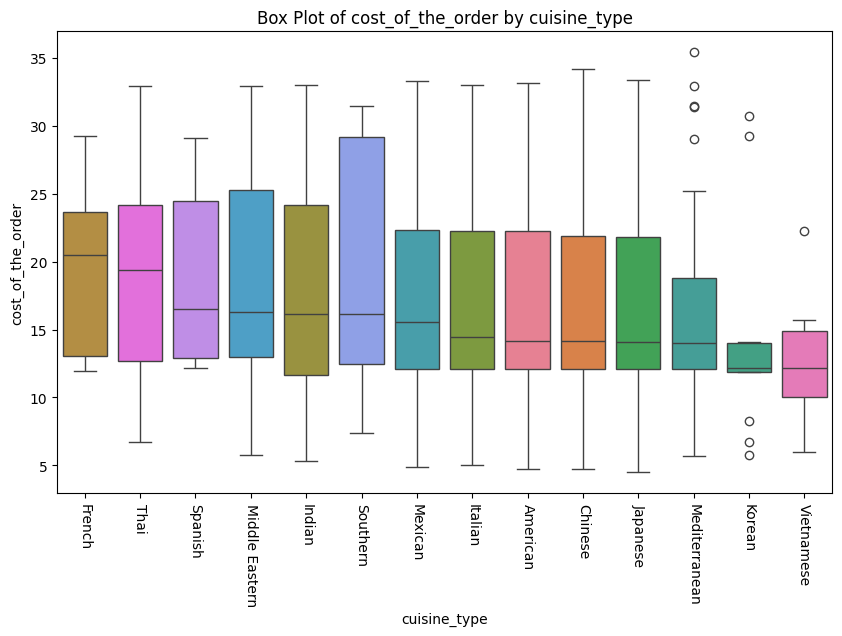

### Box Plot of food_preparation_time by cuisine_type

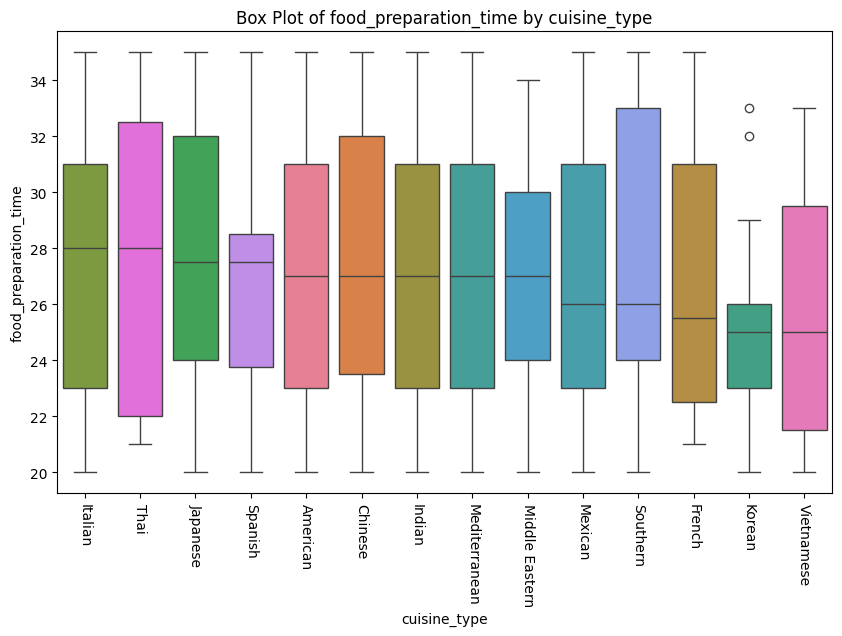

### Box Plot of delivery_time by cuisine_type

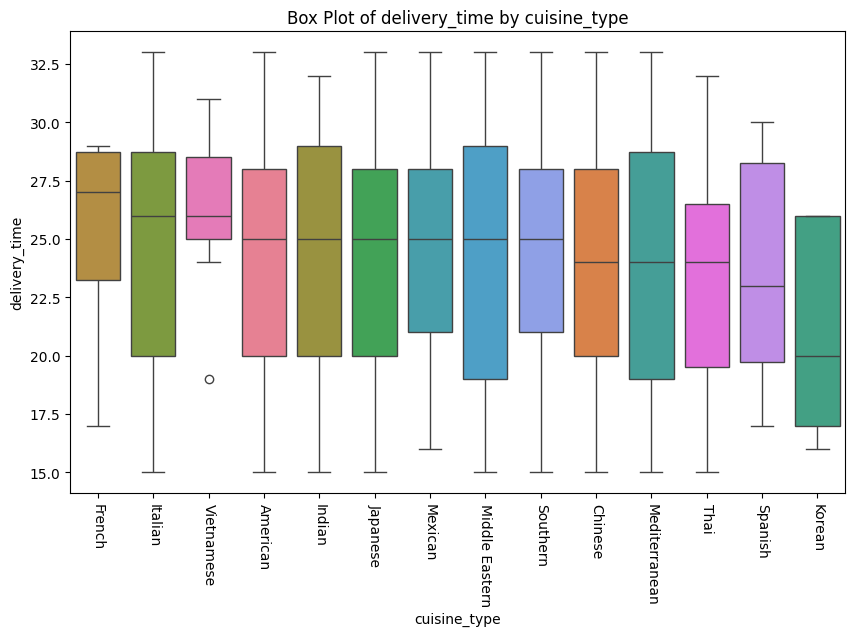

### Box Plot of cost_of_the_order by day_of_the_week

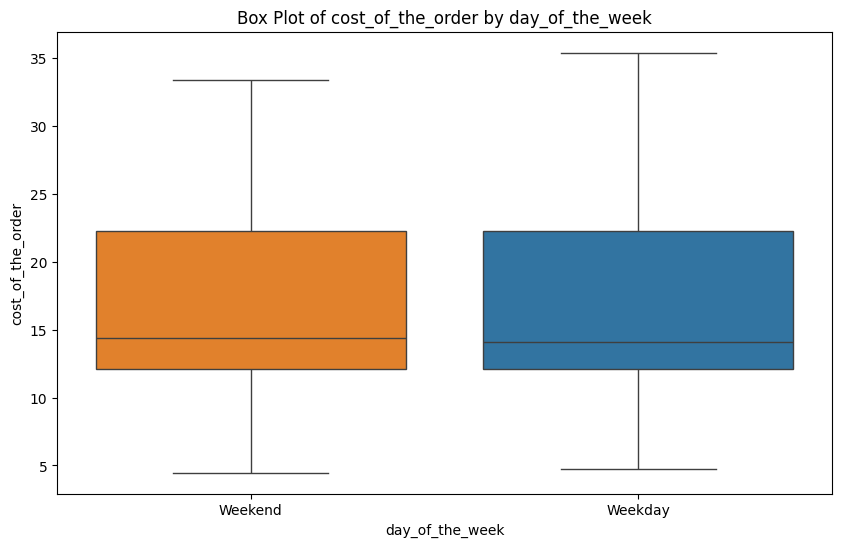

### Box Plot of food_preparation_time by day_of_the_week

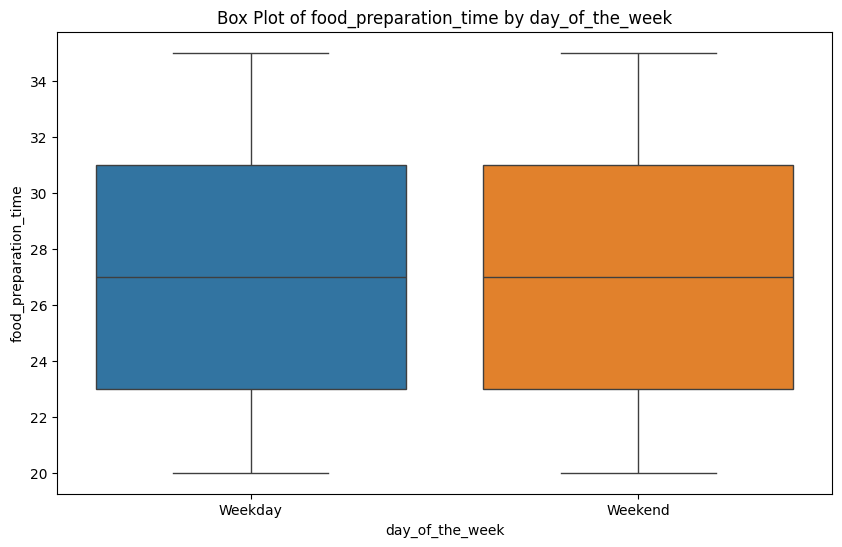

### Box Plot of delivery_time by day_of_the_week

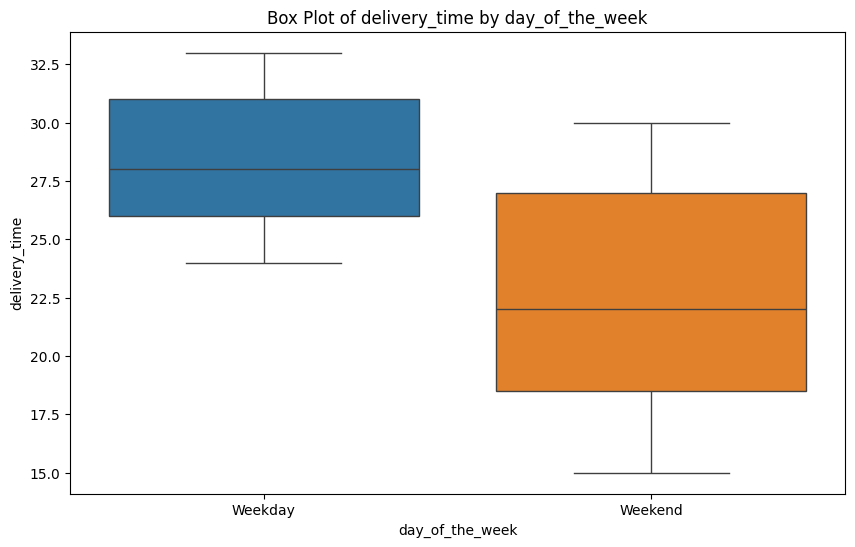

### Box Plot of cost_of_the_order by rating

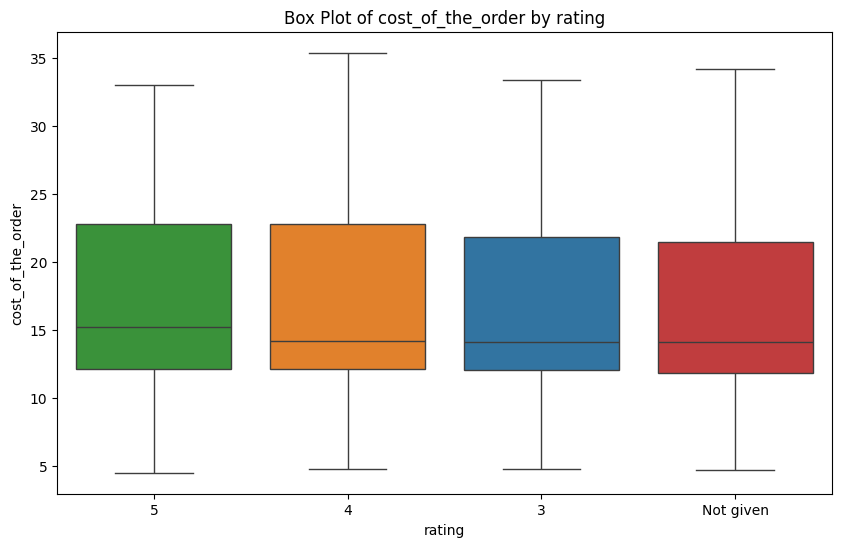

### Box Plot of food_preparation_time by rating

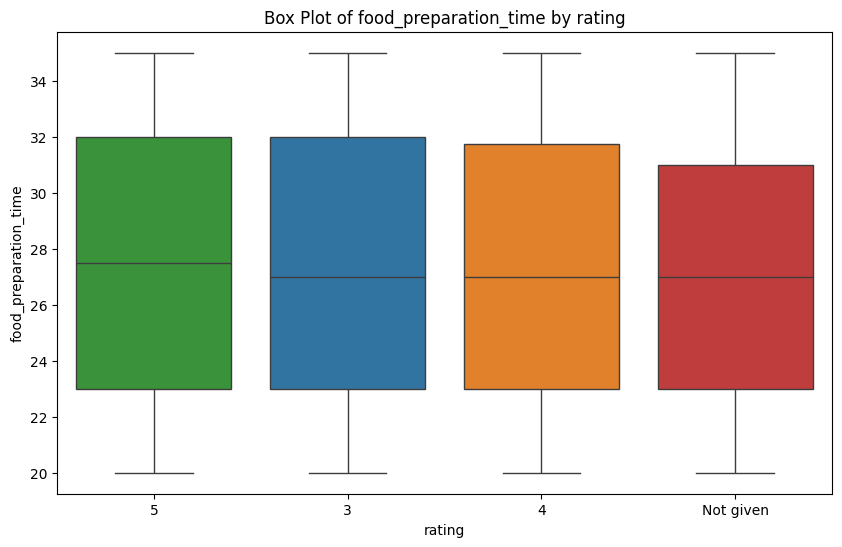

### Box Plot of delivery_time by rating

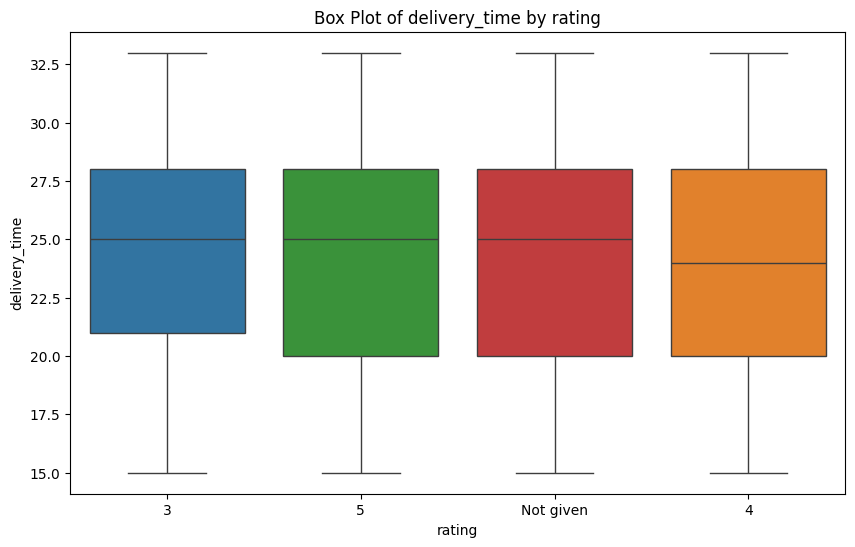

# Data Analysis Report

## 1. Correlation Heatmap Analysis

### Overview
The correlation heatmap provides insights into the relationships between three continuous variables: `cost_of_the_order`, `food_preparation_time`, and `delivery_time`. 

### Correlation Coefficients
- **cost_of_the_order vs. food_preparation_time**: 
  - Correlation: **0.0415**
  - Interpretation: There is a very weak positive correlation, suggesting that as the cost of the order increases, the food preparation time slightly increases. However, this relationship is negligible.

- **cost_of_the_order vs. delivery_time**: 
  - Correlation: **-0.0299**
  - Interpretation: There is a very weak negative correlation, indicating that higher order costs are associated with slightly shorter delivery times. This relationship is also negligible.

- **food_preparation_time vs. delivery_time**: 
  - Correlation: **0.0111**
  - Interpretation: There is virtually no correlation between food preparation time and delivery time, suggesting that these two variables operate independently of each other.

### Insights
- **Weak Relationships**: All pairs exhibit weak correlations, indicating that the cost of the order, food preparation time, and delivery time do not significantly influence one another.
- **Implications**: The lack of strong correlations suggests that factors influencing these variables may be independent, and businesses may need to consider other factors when analyzing costs and times.

---

## 2. Bivariate Box Plot Analysis

### A. Cost of the Order by Cuisine Type

#### Summary Statistics
- **Mean Costs**:
  - Highest: French (19.79)
  - Lowest: Korean (14.00)
  
- **Spread**:
  - The interquartile range (IQR) varies, with Southern cuisine showing the widest spread (29.15 - 16.11) compared to Korean cuisine (14.02 - 11.84).

#### Observations
- **Central Tendencies**: 
  - French cuisine has the highest mean cost, while Korean cuisine has the lowest.
  
- **Spread**: 
  - Southern cuisine has a high variability in costs, indicating a diverse pricing strategy or menu items.
  
- **Influence of Cuisine Type**: 
  - The type of cuisine significantly influences the cost of the order, with some cuisines commanding higher prices than others.

### B. Food Preparation Time by Cuisine Type

#### Summary Statistics
- **Mean Preparation Times**:
  - Highest: American (27.44)
  - Lowest: Korean (25.46)

- **Spread**:
  - The spread is relatively consistent across cuisines, with minor variations.

#### Observations
- **Central Tendencies**: 
  - American cuisine has the longest preparation time, while Korean cuisine has the shortest.
  
- **Influence of Cuisine Type**: 
  - Cuisine type appears to have a moderate influence on food preparation times, with some cuisines requiring more time than others.

### C. Delivery Time by Cuisine Type

#### Summary Statistics
- **Mean Delivery Times**:
  - Highest: American (24.19)
  - Lowest: Korean (20.92)

- **Spread**:
  - Delivery times show a moderate spread across cuisines.

#### Observations
- **Central Tendencies**: 
  - American cuisine has the longest delivery time, while Korean cuisine has the shortest.
  
- **Influence of Cuisine Type**: 
  - Similar to food preparation time, the type of cuisine influences delivery times, with some cuisines being delivered faster than others.

### D. Cost of the Order by Day of the Week

#### Summary Statistics
- **Mean Costs**:
  - Weekday: 16.31
  - Weekend: 16.57

#### Observations
- **Central Tendencies**: 
  - Costs are slightly higher on weekends, indicating potential increased demand or pricing strategies.
  
- **Spread**: 
  - The spread is consistent, suggesting stable pricing across days.

### E. Food Preparation Time by Day of the Week

#### Summary Statistics
- **Mean Preparation Times**:
  - Weekday: 27.21
  - Weekend: 27.44

#### Observations
- **Central Tendencies**: 
  - Preparation times are slightly longer on weekends, possibly due to increased orders or staffing.

### F. Delivery Time by Day of the Week

#### Summary Statistics
- **Mean Delivery Times**:
  - Weekday: 28.34
  - Weekend: 22.47

#### Observations
- **Central Tendencies**: 
  - Delivery times are significantly shorter on weekends, indicating more efficient operations or less traffic.

---

## 3. Bivariate Box Plot Analysis by Rating

### A. Cost of the Order by Rating

#### Summary Statistics
- **Mean Costs**:
  - Rating 5: 16.97
  - Rating 3: 16.22

#### Observations
- **Central Tendencies**: 
  - Higher ratings correlate with higher average costs, suggesting that better-rated restaurants may charge more.
  
- **Spread**: 
  - The spread is consistent across ratings, indicating stable pricing strategies.

### B. Food Preparation Time by Rating

#### Summary Statistics
- **Mean Preparation Times**:
  - Rating 3: 27.43
  - Rating 5: 27.36

#### Observations
- **Central Tendencies**: 
  - Preparation times are relatively consistent across ratings, indicating that food quality does not significantly affect preparation time.

### C. Delivery Time by Rating

#### Summary Statistics
- **Mean Delivery Times**:
  - Rating 3: 24.56
  - Rating 5: 24.21

#### Observations
- **Central Tendencies**: 
  - Delivery times are slightly shorter for higher-rated restaurants, suggesting that better-rated establishments may have more efficient delivery processes.

---

## Conclusion
The analysis reveals that while there are some differences in costs, preparation times, and delivery times across various cuisines and days of the week, the relationships between these variables are generally weak. The influence of cuisine type and customer ratings on costs and times is evident, but the overall correlations suggest that other factors may play a significant role in determining these metrics. Further investigation into external factors such as location, order volume, and customer preferences may provide deeper insights into the dynamics of food delivery services.

In [31]:
display(Markdown(bivariate_analysis))

In [32]:
## Combine summary stats, univariate report, bivariate report all together
from langchain.text_splitter import RecursiveCharacterTextSplitter

def final_report_function(llm):
    """
    Generates a final report with conclusions and recommendations for the business
    
    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        llm: OpenAI model instance for invoking the analysis.
    
    Returns:
        str: The complete report with visualizations and their analyses.
    """
    try:
        # Reports to combine
        # summary_stats_report, univariate_analysis, bivariate_analysis
        # Generate the final report
        final_report = f"""
        {univariate_analysis}\n\n
        {bivariate_analysis}\n\n
        """



        prompt = """ 
        You are an expert data analyst. Analyze, review the report and write a concise executive summary of your final conclusions from the analysis,
        and recommendations to help improve the business.
        
        Here is the report to analyze:
        {report_placeholder}
        """
        
        univariate_summary = llm.invoke(prompt.format(report_placeholder = univariate_analysis))
        bivariate_summary = llm.invoke(prompt.format(report_placeholder = bivariate_analysis))
    
        complete_report = f"""
        {univariate_summary}\n\n
        {bivariate_summary}\n\n
        """

        final_report = llm.invoke(prompt.format(report_placeholder = complete_report))
        return final_report
        
    except Exception as e:
        raise Exception(f"An error occurred while generating the final report: {e}")
    


In [33]:
final_report = f"""
{univariate_analysis}\n\n
{bivariate_analysis}\n\n
"""

In [34]:
with open("./final_report.md", "w", encoding="utf-8") as f:
        f.write(final_report)

In [187]:
%pip install "unstructured[md]" nltk

Note: you may need to restart the kernel to use updated packages.


In [191]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aruns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aruns\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk

try:
    print(nltk.data.find('tokenizers/punkt'))
except Exception as e:
    print("Downloading NLTK 'punkt' tokenizer data...")
    nltk.download('punkt')

try:
    print(nltk.data.find('taggers/averaged_perceptron_tagger'))
except Exception as e:
    print("Downloading NLTK 'averaged_perceptron_tagger' data...")
    nltk.download('averaged_perceptron_tagger')


C:\Users\aruns\AppData\Roaming\nltk_data\tokenizers\punkt\PY3
C:\Users\aruns\AppData\Roaming\nltk_data\taggers\averaged_perceptron_tagger


In [35]:
from langchain_community.document_loaders import UnstructuredMarkdownLoader
from langchain_core.documents import Document

markdown_path = "./final_report.md"
loader = UnstructuredMarkdownLoader(markdown_path)

data = loader.load()

In [36]:
final_documents=RecursiveCharacterTextSplitter(chunk_size=2000,chunk_overlap=100).split_documents(data)
final_documents

[Document(metadata={'source': './final_report.md'}, page_content='Univariate Analysis Report\n\nHistograms of Numeric Features\n\nHistograms of Numeric Features\n\nBox Plots of Numeric Features\n\nBox Plots of Numeric Features\n\nCount Plots of Categorical Features\n\nCount Plots of Categorical Features\n\nData Analysis Report\n\nThis report provides a comprehensive analysis of the provided data, focusing on histograms, box plots, and count plots. The analysis covers the characteristics of the data, insights derived from the distributions, and implications of observed patterns.\n\nHistogram Data Analysis\n\n1. Cost of the Order\n\nDistribution Shape: The distribution appears to be right-skewed, indicating that most orders are on the lower end of the cost spectrum, with a few high-cost outliers.\n\nTypical Range: The majority of the costs fall between approximately $12.08 (25th percentile) and $22.30 (75th percentile).\n\nSpread/Variability: The standard deviation (7.48) suggests a mode

In [ ]:
from langchain_core.prompts import PromptTemplate

chunks_prompt="""
You are an expert data analyst. Review the analysis report and summarize the findings.
        
Here is the analysis report to review:
{text}

Summary:
"""
map_prompt_template=PromptTemplate(input_variables=['text'],
                                    template=chunks_prompt)

In [52]:
final_prompt='''
You are an expert data analyst. Review the analysis report and share your conclusions and recommendations to improve the business.
Your output should have
- Conclusions based on the data analysis
- Recommendations to the business

Structure your output in markdown format.

Here are the analysis report to review:
{text}

'''
final_prompt_template=PromptTemplate(input_variables=['text'],template=final_prompt)
final_prompt_template

PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='\nYou are an expert data analyst. Review the analysis report and share your conclusions and recommendations to improve the business.\nYour output should have\n- Conclusions based on the data analysis\n- Recommendations to the business\n\nStructure your output in markdown format.\n\nHere are the analysis report to review:\n{text}\n\n')

In [ ]:
from langchain.chains.summarize import load_summarize_chain

summary_chain=load_summarize_chain(
    llm=llm,
    chain_type="map_reduce",
    map_prompt=map_prompt_template,
    combine_prompt=final_prompt_template,
    verbose=True
)

output=summary_chain.invoke(final_documents)




> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

You are an expert data analyst. Review the analysis report and summarize the findings.

Here is the analysis report to review:
Univariate Analysis Report

Histograms of Numeric Features

Histograms of Numeric Features

Box Plots of Numeric Features

Box Plots of Numeric Features

Count Plots of Categorical Features

Count Plots of Categorical Features

Data Analysis Report

This report provides a comprehensive analysis of the provided data, focusing on histograms, box plots, and count plots. The analysis covers the characteristics of the data, insights derived from the distributions, and implications of observed patterns.

Histogram Data Analysis

1. Cost of the Order

Distribution Shape: The distribution appears to be right-skewed, indicating that most orders are on the lower end of the cost spectrum, with a few high-cost outliers.

Typical Range: The majority of the costs fa

In [54]:
Markdown(output['output_text'])

# Analysis Report Review: Conclusions and Recommendations

## Conclusions

1. **Order Cost Insights**:
   - The cost of orders is right-skewed, indicating that while most customers spend less, there is a notable segment willing to pay significantly more. The presence of high-cost outliers suggests opportunities for premium offerings.
   - The average order cost is around $16.50, with a standard deviation of $7.48, indicating moderate variability in customer spending.

2. **Food Preparation Efficiency**:
   - Food preparation times are consistent, with a typical range of 23 to 31 minutes and no significant outliers. This suggests effective kitchen operations and management.

3. **Delivery Time Analysis**:
   - Delivery times are slightly right-skewed, with most deliveries occurring within 20 to 28 minutes. However, some outliers exist, indicating potential delays that need addressing.

4. **Cuisine Preferences**:
   - American and Japanese cuisines dominate order volumes, while Vietnamese and Spanish cuisines are significantly less popular. This skew suggests a need for menu optimization based on customer preferences.

5. **Day of the Week Trends**:
   - Orders peak on weekends, indicating a potential opportunity for targeted marketing during weekdays to boost sales.

6. **Customer Ratings**:
   - A significant portion of ratings are "Not given," which limits insights into customer satisfaction. However, higher-rated orders tend to have higher average costs, suggesting a correlation between quality and price.

7. **Weak Correlations**:
   - The correlation analysis indicates weak relationships between order cost, food preparation time, and delivery time, suggesting that these variables operate independently and may be influenced by other factors.

## Recommendations

1. **Leverage High-Spending Customers**:
   - Develop premium menu items or exclusive offerings targeted at high-cost customers to capitalize on their willingness to spend more. Consider loyalty programs that reward frequent high-spenders.

2. **Optimize Menu Based on Cuisine Preferences**:
   - Focus marketing efforts and menu development on popular cuisines (American and Japanese) while considering strategies to promote less popular options (Vietnamese and Spanish) to diversify offerings.

3. **Enhance Delivery Efficiency**:
   - Investigate the causes of delivery delays, especially for outlier cases. Implement strategies such as route optimization, better staffing during peak hours, or partnerships with delivery services to improve overall delivery times.

4. **Weekday Marketing Campaigns**:
   - Create targeted promotions or discounts for weekdays to increase order volume during slower periods. This could include special deals on popular items or limited-time offers.

5. **Improve Customer Feedback Collection**:
   - Implement strategies to encourage customers to provide ratings and feedback, such as follow-up emails or incentives for completing surveys. This will help gather more comprehensive insights into customer satisfaction.

6. **Monitor and Adjust Pricing Strategies**:
   - Regularly review pricing strategies based on customer spending patterns and competitor analysis. Consider dynamic pricing models that adjust based on demand, especially during peak times.

7. **Investigate External Influences**:
   - Conduct further analysis to identify external factors influencing order costs, preparation times, and delivery times. This could include location-based factors, seasonal trends, or customer demographics.

By implementing these recommendations, the business can enhance operational efficiency, improve customer satisfaction, and ultimately drive profitability.

In [55]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver

class State(TypedDict):
  topic: str
  joke: str


def refine_topic(state: State):
    return {"topic": state["topic"] + " and cats"}


def generate_joke(state: State):
    return {"joke": f"This is a joke about {state['topic']}"}

graph = (
  StateGraph(State)
  .add_node(refine_topic)
  .add_node(generate_joke)
  .add_edge(START, "refine_topic")
  .add_edge("refine_topic", "generate_joke")
  .add_edge("generate_joke", END)
  .compile(interrupt_before=[ "generate_joke"], checkpointer = MemorySaver())
)

In [56]:
import uuid

thread_id = str(uuid.uuid4())
thread = {"configurable": {"thread_id": thread_id}}

state = None
for chunk in graph.stream({"topic":"ice cream"}, thread, stream_mode="values"):
    state = chunk

In [58]:
thread_id, state

('c7ea4768-94ea-4e9d-9518-c83262fe453f', {'topic': 'ice cream and cats'})

In [48]:
graph.update_state(thread, state, as_node = START)

{'configurable': {'thread_id': 'f8ce5bf6-f152-41ea-b856-a82c0d602a8f',
  'checkpoint_ns': '',
  'checkpoint_id': '1f04f810-836a-6ca2-8000-96173b2ac6cf'}}

In [49]:
for chunk in graph.stream(
    None, thread,
    stream_mode="values",
):
    state = chunk

In [50]:
state

{'topic': 'ice cream and cats'}

In [51]:
graph.update_state(thread, state, as_node = "refine_topic")

{'configurable': {'thread_id': 'f8ce5bf6-f152-41ea-b856-a82c0d602a8f',
  'checkpoint_ns': '',
  'checkpoint_id': '1f04f811-40e0-67ff-8002-ae5a33487ef7'}}

In [52]:
for chunk in graph.stream(
    None, thread,
    stream_mode="values",
):
    state = chunk

In [53]:
state

{'topic': 'ice cream and cats',
 'joke': 'This is a joke about ice cream and cats'}

In [54]:
graph.get_state(thread)

StateSnapshot(values={'topic': 'ice cream and cats', 'joke': 'This is a joke about ice cream and cats'}, next=(), config={'configurable': {'thread_id': 'f8ce5bf6-f152-41ea-b856-a82c0d602a8f', 'checkpoint_ns': '', 'checkpoint_id': '1f04f811-6008-667e-8003-3e965a68a37b'}}, metadata={'source': 'loop', 'writes': {'generate_joke': {'joke': 'This is a joke about ice cream and cats'}}, 'step': 3, 'parents': {}, 'thread_id': 'f8ce5bf6-f152-41ea-b856-a82c0d602a8f'}, created_at='2025-06-22T15:53:48.698360+00:00', parent_config={'configurable': {'thread_id': 'f8ce5bf6-f152-41ea-b856-a82c0d602a8f', 'checkpoint_ns': '', 'checkpoint_id': '1f04f811-40e0-67ff-8002-ae5a33487ef7'}}, tasks=())

In [24]:
import pandas as pd

df = pd.read_feather(r"C:\Users\aruns\Documents\Learning\Agentic AI\Langgraph_workflows\src\temp_data\df_updated.feather")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   object  
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   float64 
 4   ZIPCode             5000 non-null   object  
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(2), int64(4), object(2)
memory usage: 342.7+ KB


<Axes: xlabel='Family', ylabel='count'>

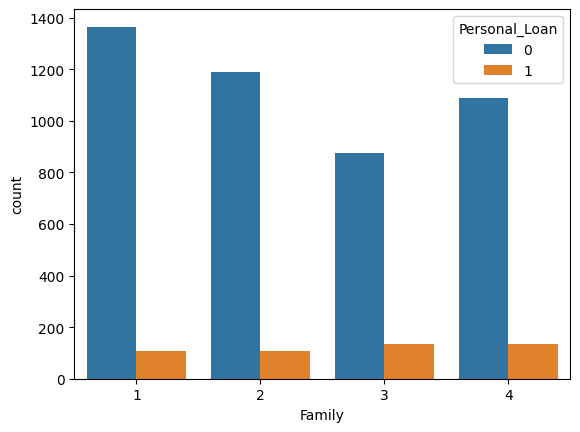

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x="Family", hue="Personal_Loan")

In [34]:
target = "Personal_Loan"
predictor = "Family"

sorter = df[target].value_counts().index[-1]

tab = pd.crosstab(df[predictor], df[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

In [39]:
from IPython.display import display, Markdown
Markdown(tab.to_markdown())

| Family   |    0 |   1 |   All |
|:---------|-----:|----:|------:|
| All      | 4520 | 480 |  5000 |
| 4        | 1088 | 134 |  1222 |
| 3        |  877 | 133 |  1010 |
| 1        | 1365 | 107 |  1472 |
| 2        | 1190 | 106 |  1296 |